In [1]:
import pickle 
import torch

file_name = f"/oscar/data/csci2952g/csci2952g/final_project/data/preprocessing_output/tensors_microglial.pkl"

with open(file_name, "rb") as train_test_file:
    X_train_tensor = pickle.load(train_test_file)
    X_test_tensor = pickle.load(train_test_file)
    X_val_tensor = pickle.load(train_test_file)
    y_train_tensor = pickle.load(train_test_file)
    y_val_tensor = pickle.load(train_test_file)
    y_test_tensor = pickle.load(train_test_file)

# print(X_train_tensor)
# display(X_train_selected)

# print(X_val_tensor)
# display(X_val_selected)

# print(X_test_tensor)
# display(X_test_selected)

print('---------')
print(y_train_tensor.shape)

print('---------')
print(y_val_tensor.shape)

print('---------')
print(y_test_tensor.shape)


---------
torch.Size([3244])
---------
torch.Size([812])
---------
torch.Size([1015])


In [1]:
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR, CyclicLR
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adamax, Adam, AdamW
import numpy as np
import pickle
import json
import random
import pandas as pd

def load_data(cell_type):
    data_filepath = f'/oscar/data/csci2952g/csci2952g/final_project/data/preprocessing_output/tensors_{cell_type}.pkl'

    with open(data_filepath, "rb") as train_test_file:
        X_train_tensor = pickle.load(train_test_file)
        X_test_tensor = pickle.load(train_test_file)
        X_val_tensor = pickle.load(train_test_file)
        y_train_tensor = pickle.load(train_test_file)
        y_val_tensor = pickle.load(train_test_file)
        y_test_tensor = pickle.load(train_test_file)

        return X_train_tensor, X_test_tensor, X_val_tensor, y_train_tensor, y_val_tensor, y_test_tensor


#Example Use:

celltype = "microglial"

X_train_tensor, X_test_tensor, X_val_tensor, y_train_tensor, y_val_tensor, y_test_tensor = load_data(celltype)

In [2]:
# Convert tensors to numpy arrays
X_train = X_train_tensor.cpu().numpy()
X_test = X_test_tensor.cpu().numpy()
X_val = X_val_tensor.cpu().numpy()
y_train = y_train_tensor.cpu().numpy().ravel()  # .ravel() ensures y is 1D
y_val = y_val_tensor.cpu().numpy().ravel()
y_test = y_test_tensor.cpu().numpy().ravel()

In [2]:
# ## astrocytes

# import torch
# from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR, CyclicLR
# from torch.utils.data import DataLoader, Dataset
# from torch.optim import Adamax, Adam, AdamW
# import numpy as np
# import pickle
# import json
# import random
# import pandas as pd

# def load_data(cell_type):
#     data_filepath = f'/oscar/data/csci2952g/csci2952g/final_project/data/preprocessing_output/tensors_{cell_type}.pkl'

#     with open(data_filepath, "rb") as train_test_file:
#         X_train_tensor = pickle.load(train_test_file)
#         X_test_tensor = pickle.load(train_test_file)
#         X_val_tensor = pickle.load(train_test_file)
#         y_train_tensor = pickle.load(train_test_file)
#         y_val_tensor = pickle.load(train_test_file)
#         y_test_tensor = pickle.load(train_test_file)

#         return X_train_tensor, X_test_tensor, X_val_tensor, y_train_tensor, y_val_tensor, y_test_tensor


# #Example Use:

# celltype = "astrocyte"

# X_train_tensor, X_test_tensor, X_val_tensor, y_train_tensor, y_val_tensor, y_test_tensor = load_data(celltype)

# # Convert tensors to numpy arrays
# X_train = X_train_tensor.cpu().numpy()
# X_test = X_test_tensor.cpu().numpy()
# X_val = X_val_tensor.cpu().numpy()
# y_train = y_train_tensor.cpu().numpy().ravel()  # .ravel() ensures y is 1D
# y_val = y_val_tensor.cpu().numpy().ravel()
# y_test = y_test_tensor.cpu().numpy().ravel()

In [1]:
# import torch
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# log_reg = LogisticRegression(max_iter=1000, class_weight='balanced') 
# log_reg.fit(X_train, y_train)
# y_pred_logreg = log_reg.predict(X_test)
# print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
# conf_matrix = confusion_matrix(y_test, y_pred_logreg)
# print(conf_matrix)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
#                               display_labels=log_reg.classes_)
# disp.plot()
# plt.show()

# rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_clf.fit(X_train, y_train)
# y_pred_rf = rf_clf.predict(X_test)
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# conf_matrix = confusion_matrix(y_test, y_pred_rf)
# print(conf_matrix)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
#                               display_labels=log_reg.classes_)
# disp.plot()
# plt.show()

# import xgboost as xgb

# neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
# scale_pos_weight = neg / pos

# xgb_clf = xgb.XGBClassifier(
#     n_estimators=100,
#     scale_pos_weight=scale_pos_weight,
#     eval_metric='logloss',
#     random_state=42
# )

# xgb_clf.fit(X_train, y_train)
# y_pred_xgb = xgb_clf.predict(X_test)
# print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# conf_matrix = confusion_matrix(y_test, y_pred_xgb)
# print(conf_matrix)

# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
#                               display_labels=log_reg.classes_)
# disp.plot()
# plt.show()


In [3]:
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR, CyclicLR
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adamax, Adam, AdamW
import numpy as np
import pickle
import json
import random
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve


def load_data(cell_type):
    data_filepath = f'/oscar/data/csci2952g/csci2952g/final_project/data/preprocessing_output/tensors_{cell_type}.pkl'

    with open(data_filepath, "rb") as train_test_file:
        X_train_tensor = pickle.load(train_test_file)
        X_test_tensor = pickle.load(train_test_file)
        X_val_tensor = pickle.load(train_test_file)
        y_train_tensor = pickle.load(train_test_file)
        y_val_tensor = pickle.load(train_test_file)
        y_test_tensor = pickle.load(train_test_file)
        # Convert tensors to numpy arrays

        X_train = X_train_tensor.cpu().numpy()
        X_test = X_test_tensor.cpu().numpy()
        X_val = X_val_tensor.cpu().numpy()
        y_train = y_train_tensor.cpu().numpy().ravel()  # .ravel() ensures y is 1D
        y_val = y_val_tensor.cpu().numpy().ravel()
        y_test = y_test_tensor.cpu().numpy().ravel()
    
        return X_train, X_test, X_val, y_train, y_val, y_test


def train_ML(cell_type, X_train, X_test, X_val, y_train, y_val, y_test):
    
    log_reg = LogisticRegression(max_iter=1000, class_weight='balanced') 
    log_reg.fit(X_train, y_train)
    y_pred_logreg = log_reg.predict(X_test)
    y_prob_logreg = log_reg.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class
    auc_logreg = roc_auc_score(y_test, y_prob_logreg)
    print("Logistic Regression AUC-ROC:", auc_logreg)
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
    conf_matrix = confusion_matrix(y_test, y_pred_logreg)
    print(conf_matrix)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                  display_labels=log_reg.classes_)
    disp.plot()
    plt.title(f'{cell_type} - logistic regression')
    plt.show()
        
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)
    y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
    auc_rf = roc_auc_score(y_test, y_prob_rf)
    print("Random Forest AUC-ROC:", auc_rf)
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    print(conf_matrix)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                  display_labels=log_reg.classes_)
    disp.plot()
    plt.title(f'{cell_type} - random forest')
    plt.show()
    
    import xgboost as xgb
    
    neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
    scale_pos_weight = neg / pos
    
    xgb_clf = xgb.XGBClassifier(
        n_estimators=100,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss',
        random_state=42
    )
    
    xgb_clf.fit(X_train, y_train)
    y_pred_xgb = xgb_clf.predict(X_test)
    y_prob_xgb = xgb_clf.predict_proba(X_test)[:, 1]
    auc_xgb = roc_auc_score(y_test, y_prob_xgb)
    print("XGBoost AUC-ROC:", auc_xgb)
    print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    print(conf_matrix)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                  display_labels=log_reg.classes_)
    disp.plot()
    plt.title(f'{cell_type} - xgboost')
    plt.show()
    


Logistic Regression AUC-ROC: 0.9216833605373099
Logistic Regression Accuracy: 0.8432631866630227
[[1389  284]
 [ 863 4782]]


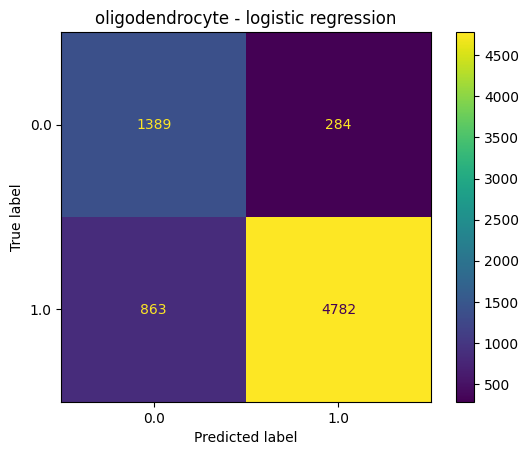

Random Forest AUC-ROC: 0.9027949769617702
Random Forest Accuracy: 0.823312380431812
[[ 388 1285]
 [   8 5637]]


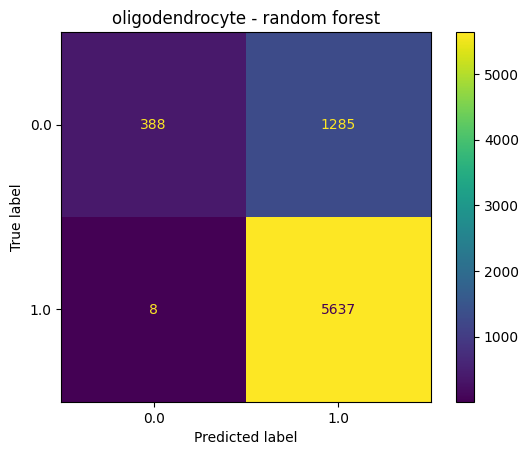

XGBoost AUC-ROC: 0.9322921172352854
XGBoost Accuracy: 0.882344902978956
[[1212  461]
 [ 400 5245]]


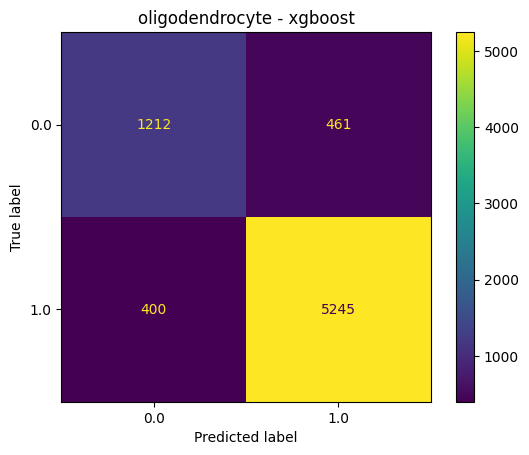

Logistic Regression AUC-ROC: 0.9054404298611248
Logistic Regression Accuracy: 0.8458659407961892
[[ 522  147]
 [ 306 1964]]


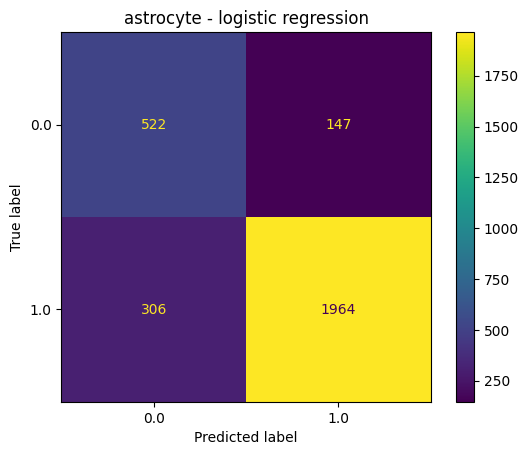

Random Forest AUC-ROC: 0.887048523998604
Random Forest Accuracy: 0.8183055461041171
[[ 138  531]
 [   3 2267]]


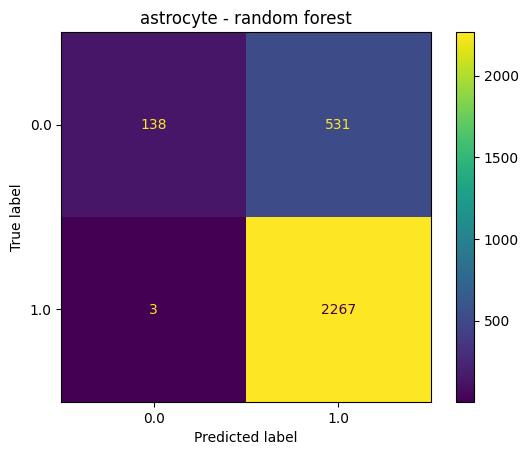

XGBoost AUC-ROC: 0.9115456036032475
XGBoost Accuracy: 0.8860156515821708
[[ 447  222]
 [ 113 2157]]


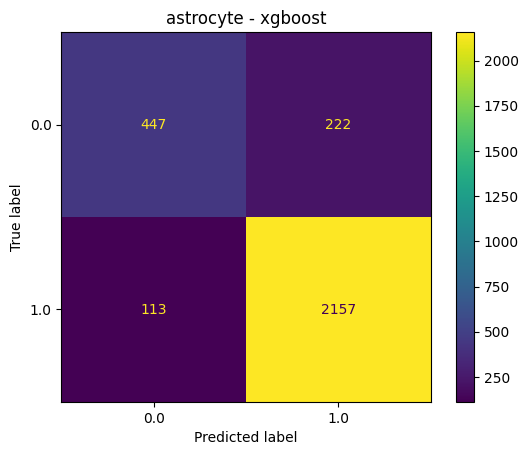

Logistic Regression AUC-ROC: 0.8473107500000001
Logistic Regression Accuracy: 0.76275
[[1501  499]
 [ 450 1550]]


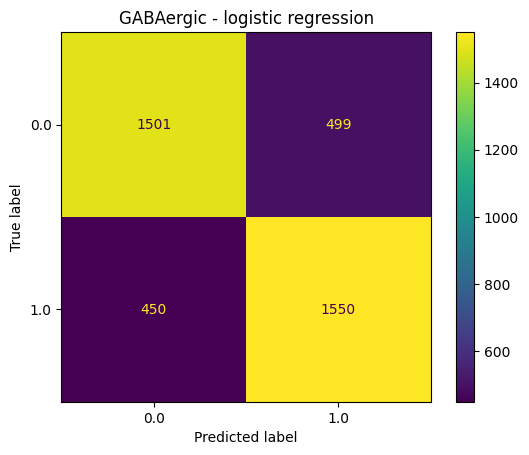

Random Forest AUC-ROC: 0.788187375
Random Forest Accuracy: 0.71
[[1389  611]
 [ 549 1451]]


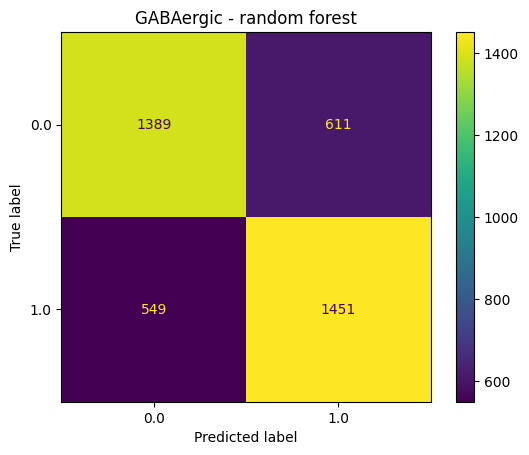

XGBoost AUC-ROC: 0.8368595000000001
XGBoost Accuracy: 0.75025
[[1472  528]
 [ 471 1529]]


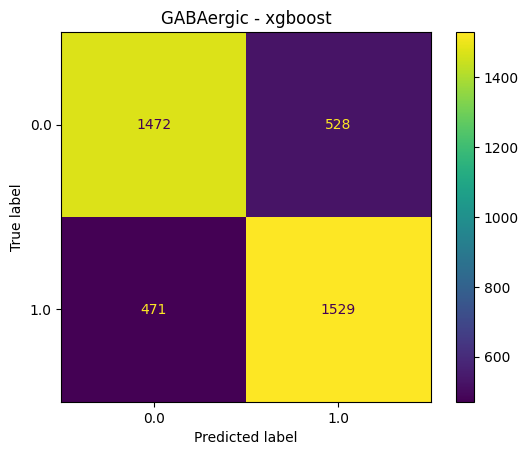

Logistic Regression AUC-ROC: 0.8911126537967299
Logistic Regression Accuracy: 0.8896551724137931
[[ 98  60]
 [ 52 805]]


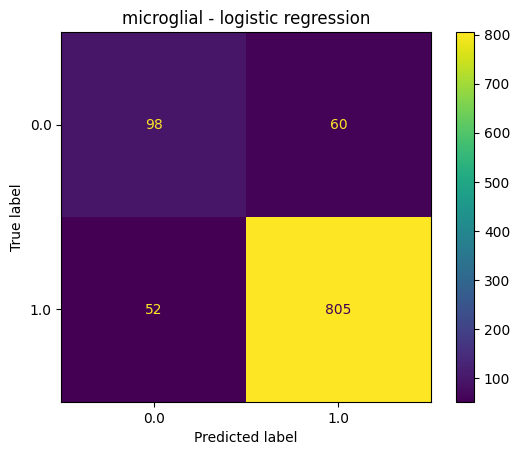

Random Forest AUC-ROC: 0.8746399716408431
Random Forest Accuracy: 0.8492610837438423
[[  5 153]
 [  0 857]]


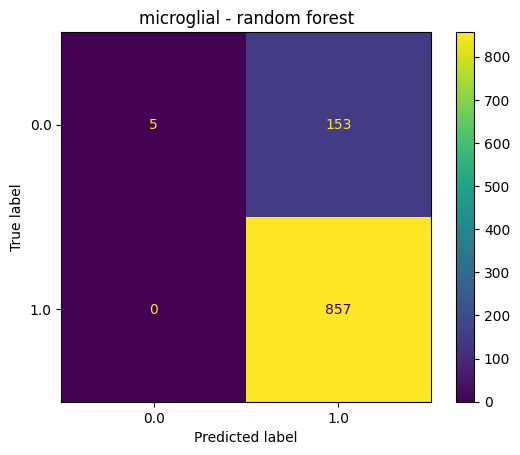

XGBoost AUC-ROC: 0.8914154468782771
XGBoost Accuracy: 0.8926108374384236
[[ 73  85]
 [ 24 833]]


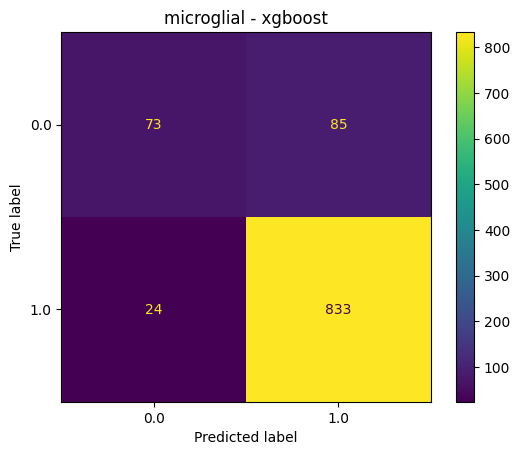

In [4]:
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

celltype_list = ["oligodendrocyte", "astrocyte", "GABAergic", "microglial"]

for cell_type in celltype_list:
    X_train, X_test, X_val, y_train, y_val, y_test = load_data(cell_type)
    train_ML(cell_type, X_train, X_test, X_val, y_train, y_val, y_test)